# K Nearest Neighbors with Python¶

How does the KNN algorithm work?

In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.


For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:

Calculate distance
Find closest neighbors
Vote for labels


How do you decide the number of neighbors in KNN?

Now, you understand the KNN algorithm working mechanism. At this point, the question arises that How to choose the optimal number of neighbors? And what are its effects on the classifier? The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.



Classifier Building in Python and Scikit-learn

we can use the wine dataset, which is a very famous multi-class classification problem. This data is the result of a chemical analysis of wines grown in the same region in Italy using three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [ ]:
from sklearn import datasets

In [2]:
wine=datasets.load_wine()

In [3]:
type(wine)

sklearn.utils.Bunch

In [4]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
X=wine.data
y=wine.target

In [11]:
X.shape,y.shape

((178, 13), (178,))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42,stratify=y)

### Generataing model for K=3

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [15]:
knn=KNeighborsClassifier(n_neighbors=3)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [17]:
y_predict=knn.predict(X_test)
accuracy_score(y_test, y_predict)


0.6949152542372882

### Generating model for K=5

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
accuracy_score(y_test, y_predict)

0.711864406779661

### Genarating model for k=7

In [23]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)
accuracy_score(y_test,y_predict)

0.7288135593220338

# Here, you have increased the number of neighbors in the model and accuracy got increased. But, this is not necessary for each case that an increase in many neighbors increases the accuracy.
The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm. KNN can be useful in case of nonlinear data. It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value

The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large dimensional data.

In [24]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

### Standardization in Sklearn

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sclar=StandardScaler()

In [27]:
X_scaled=sclar.fit_transform(X)

In [28]:
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [29]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0,stratify =y)

In [32]:
knn=KNeighborsClassifier(n_neighbors=7)

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [34]:
y_predict=knn.predict(X_test)

In [35]:
accuracy_score(y_test,y_predict)

0.9629629629629629

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0,stratify =y)
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)
accuracy_score(y_test,y_predict)

0.9814814814814815

In [37]:
from sklearn.model_selection import cross_val_score

In [40]:
neighbors=list(range(1, 50, 2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_scaled, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [41]:
cv_scores

[0.9439735982112143,
 0.954499914000688,
 0.9666322669418644,
 0.9663398692810456,
 0.97218782249742,
 0.9718954248366012,
 0.9666322669418644,
 0.9666322669418644,
 0.9725146198830409,
 0.9725146198830409,
 0.9725146198830409,
 0.9833333333333334,
 0.9718954248366012,
 0.9660130718954247,
 0.9660130718954247,
 0.9660130718954247,
 0.9718954248366012,
 0.9718954248366012,
 0.9718954248366012,
 0.9663398692810456,
 0.9610767113863089,
 0.9610767113863089,
 0.9551943584451325,
 0.9551943584451325,
 0.9551943584451325]

In [42]:
MSE=[1 - x for x in cv_scores]

MSE

In [43]:
MSE

[0.05602640178878571,
 0.04550008599931199,
 0.03336773305813556,
 0.03366013071895435,
 0.027812177502580027,
 0.028104575163398815,
 0.03336773305813556,
 0.03336773305813556,
 0.027485380116959113,
 0.027485380116959113,
 0.027485380116959113,
 0.016666666666666607,
 0.028104575163398815,
 0.033986928104575265,
 0.033986928104575265,
 0.033986928104575265,
 0.028104575163398815,
 0.028104575163398815,
 0.028104575163398815,
 0.03366013071895435,
 0.0389232886136911,
 0.0389232886136911,
 0.04480564155486755,
 0.04480564155486755,
 0.04480564155486755]

In [44]:
optimal_k=neighbors[MSE.index(min(MSE))]

In [48]:
print('the optimal number of k is:',optimal_k)

the optimal number of k is: 23


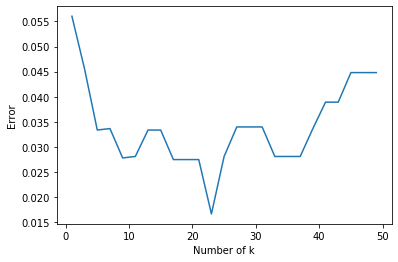

In [49]:
plt.plot(neighbors,MSE)
plt.xlabel('Number of k')
plt.ylabel('Error')
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0,stratify =y)
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)
accuracy_score(y_test,y_predict)

0.9814814814814815